# EMNIST

In [78]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from emnist import extract_training_samples,extract_test_samples
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [79]:
# # Load EMNIST dataset
train_images, train_labels = extract_training_samples('balanced')
test_images, test_labels = extract_test_samples('balanced')

#### Lable mapping

- Keeping only 5 classes 'A', 'B', 'C', 'D' and 'E' from the alphabets

In [80]:
# Identify the labels you want to keep (first 36 classes)
valid_labels = set(range(15))

def filter_data(data,labels):
    # Filter the labels and corresponding data
    filtered_indices = [i for i, label in enumerate(labels) if label in valid_labels]
    filtered_labels = labels[filtered_indices]
    # Assuming emnist_data is your array of corresponding data
    filtered_data = data[filtered_indices]
    return filtered_data, filtered_labels

In [81]:
train_images, train_labels = filter_data(train_images, train_labels)
test_images, test_labels = filter_data(test_images, test_labels)
# # Saving filtered data locally
# np.save('emnist36_train.npy', train_images)
# np.save('emnist36_train_labels.npy', train_labels)
# np.save('emnist36_test.npy', test_images)
# np.save('emnist36_test_labels.npy', test_labels)

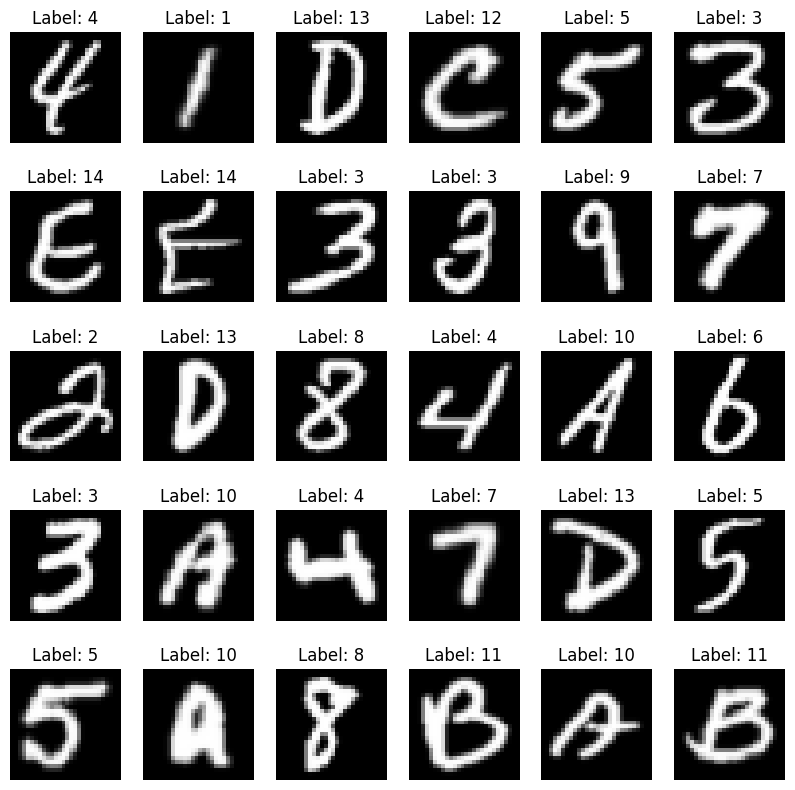

In [82]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [83]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- Taking a small random batch of emnist data

In [84]:
# Extract a batch of data
batch_size = 5000
# Set the seed for reproducibility
np.random.seed(128)
# Randomly shuffle the indices
indices = np.random.permutation(len(train_images))
selected_indices = indices[:batch_size]
# Extract images and labels based on selected indices
train_images_batch = train_images[selected_indices]
train_labels_batch = train_labels[selected_indices]

"""
~ Additional step: Reduce the batch size but make sure that all samples are included atleast ~N times
"""

'\n~ Additional step: Reduce the batch size but make sure that all samples are included atleast ~N times\n'

In [85]:
# Build the model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

In [86]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
# Train the model on the MNIST dataset
model.fit(train_images_batch, train_labels_batch, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5


125/125 [==============================] - 1s 4ms/step - loss: 11.9815 - accuracy: 0.2895 - val_loss: 2.4683 - val_accuracy: 0.2530
Epoch 2/5
125/125 [==============================] - 0s 3ms/step - loss: 2.0805 - accuracy: 0.3590 - val_loss: 2.0968 - val_accuracy: 0.3930
Epoch 3/5
125/125 [==============================] - 0s 3ms/step - loss: 1.7674 - accuracy: 0.4423 - val_loss: 1.8712 - val_accuracy: 0.4770
Epoch 4/5
125/125 [==============================] - 0s 3ms/step - loss: 1.5977 - accuracy: 0.5337 - val_loss: 2.0110 - val_accuracy: 0.5200
Epoch 5/5
125/125 [==============================] - 0s 3ms/step - loss: 1.4630 - accuracy: 0.5773 - val_loss: 1.7183 - val_accuracy: 0.5800


In [88]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {round(test_acc*100,2)} %')

188/188 [==============================] - 0s 1ms/step - loss: 1.7161 - accuracy: 0.5482
Test accuracy: 54.82 %


In [89]:
test_label_predict = model.predict(test_images)
test_label_predict = tf.argmax(test_label_predict, axis=1).numpy()

188/188 [==============================] - 0s 1ms/step


- Mapping labels for visualization clarity

In [90]:

"""
Working on mapping
"""
# Assuming emnist_labels is the array of original labels
# emnist_labels = np.array([0, 1, 2, ..., 45, 46])

# Define a mapping for digits and alphabets
digit_mapping = {i: str(i) for i in range(10)}
alphabet_mapping = {i: chr(i + 55) for i in range(10,47)}  # ASCII code for 'A' is 65, so we use 55 to map to 11

# Apply the mapping to the labels
mapped_labels = np.array([digit_mapping[label] if label < 10 else alphabet_mapping[label] for label in test_label_predict])


In [91]:
import random
# Generate 9 random numbers between 0 and 6000
random_numbers = random.sample(range(6000), 25)

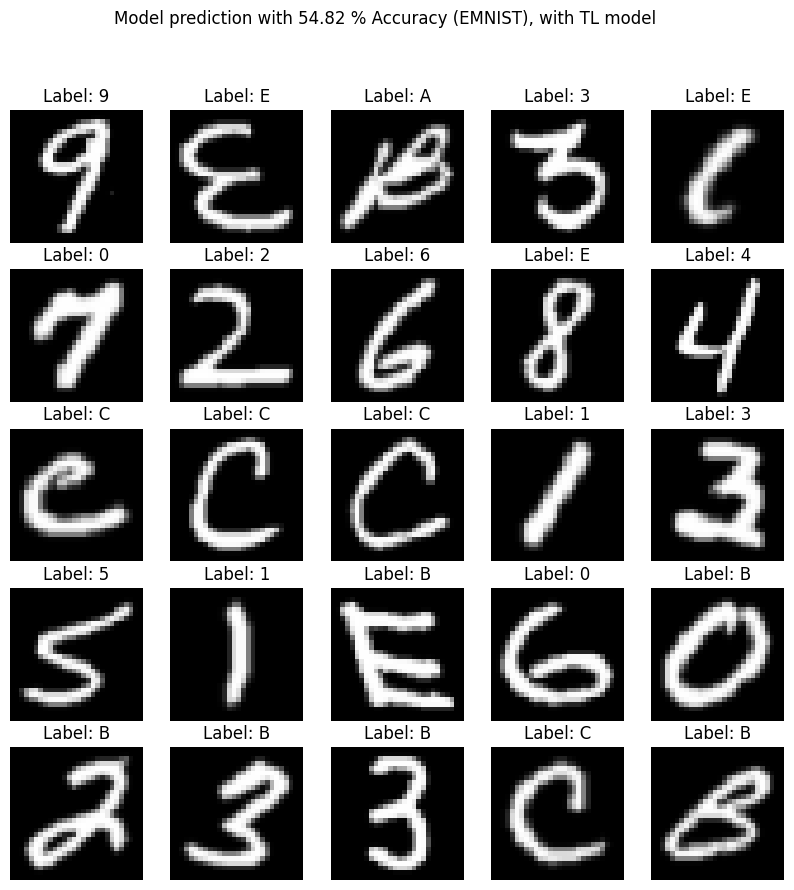

In [92]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Label: {mapped_labels[i]}") 
    plt.axis('off')
    plt.suptitle('Model prediction with {} % Accuracy (EMNIST), with TL model'.format(round((test_acc*100),2)))
plt.show()